<a href="https://colab.research.google.com/github/jamartinezv2020/DITE/blob/main/Jose_Martinez_Diana_Huertas_Dairo_Rivas_Lab_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 4 Parte 2

### Support Vector Machines

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### UdeA - Ude@

#### Profesor: Antonio Tamayo Herrera

#### Nombre: José Alfredo Martínez Valdés
#### Cédula: 16885496

#### Nombre: Dairo Joan Rivas Garcia
#### Cédula: 1020464449

#### Nombre: Diana Carolina Huertas
#### Cédula: 40944999

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Indicaciones

Este ejercicio tiene como objetivo implementar una SVM para resolver un problema de clasificación multietiqueta o multiclase.

Para el problema de clasificación usaremos la siguiente base de datos: https://archive.ics.uci.edu/ml/datasets/Cardiotocography

#### Abstract:
The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.


#### Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

#### Attribute Information:

LB - FHR baseline (beats per minute)

AC - # of accelerations per second

FM - # of fetal movements per second

UC - # of uterine contractions per second

DL - # of light decelerations per second

DS - # of severe decelerations per second

DP - # of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - # of histogram peaks

Nzeros - # of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

CLASS - FHR pattern class code (1 to 10)

NSP - fetal state class code (N=normal (1); S=suspect (2); P=pathologic (3))


In [ ]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
import time

#cargamos la bd de entrenamiento
db = np.loadtxt("https://raw.githubusercontent.com/Joanri20/modelosysimulaciondos/trunk/DB_Fetal_Cardiotocograms.txt",delimiter='\t')

#db = np.loadtxt('DB_Fetal_Cardiotocograms.txt',delimiter='\t')  # Assuming tab-delimiter

X = db[:,0:21]

#Solo para dar formato a algunas variables
for i in range(1,7):
    X[:,i] = X[:,i]*1000

X = X
Y = db[:,22]

#print np.shape(X)


## Ejercicio 1.

**1.1. El problema planteado es multiclase? Se puede resolver a través del modelo SVM? Explique cómo.**

R/: El problema es multiclases ya que tiene varias clases en la variable de salida.
Se puede utilizar para clasificaciones  de 10 o 3 clases.

* Con la columna #22 (FHR) (1 to 10)
* Con la columna #23 (NSP)  (N=normal (1); S=suspect (2); P=pathologic (3))

Un método habitual para resolver problemas de clasificación multiclase utilizando Máquinas de Vectores de Soporte (SVM) es la técnica conocida como “one vs rest”. Esta técnica consiste en entrenar un clasificador SVM binario distinto para cada clase presente en el conjunto de datos. El objetivo de cada clasificador es diferenciar su clase asignada del resto de clases combinadas.

Al enfrentarse a una nueva muestra que necesita ser clasificada, se ejecutan todos los clasificadores SVM. Cada uno emitirá una valoración reflejando la probabilidad de que la muestra pertenezca a la clase que representa. Finalmente, se elige la clase correspondiente al clasificador que ofrezca la valoración más convincente o el puntaje más elevado.
    
**1.2 Explique como se asigna la clase a una nueva muestra para el problema anterior de acuerdo a la respuesta que dio en la pregunta anterior.**

R/:
1. Inicialmente, se procede a entrenar múltiples clasificadores autónomos utilizando el método SVM con One VS all. Cada uno de estos clasificadores tiene la tarea de determinar si un elemento en particular es miembro de una clase concreta. Tomando como ejemplo tres clases denominadas A, B y C, se establecerán tres clasificadores SVM, asignando uno a cada una de las clases mencionadas.

2. Ahora, llega una nueva muestra que queremos clasificar. Analizamos la muestra a los clasificadores que la reclaman, si 2 modelos la reclaman esta será asignada al modelo mas lejano, mientras que si 3 o más modelos la reclaman, esta será asginada al modelo más cercano.

## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Consulte la documentación oficial sklearn para el modelo SVM. http://scikit-learn.org/stable/modules/svm.html

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)




#Complete el código para crear el clasificador SVM. Tenga en cuenta que el problema es multiclase.
#Consulte como lo puede tratar con la SVM.
#Use un kernel rbf con una malla de valores así: C en {0.1,1,10,100} y gamma en {0.0001,0.01, 0.1}
def train_svm_model(X, Y, C, gamma):
  tiempo_i = time.time()

  # Crear un clasificador SVM con kernel RBF
  clf = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=C, gamma=gamma)


#Implemetamos la metodología de validación cross validation con 10 folds

  Errores = np.ones(10)
  j = 0
  kf = KFold(n_splits=10)
  matrices_confusion = []

  for train_index, test_index in kf.split(X):

      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]

      #Complete el código
      # Entrenar el modelo.
      model = clf.fit(X_train, y_train)


      #Complete el código aquí
      # Validación del modelo
      y_pred = model.predict(X_test)
      etiquetas_clase = unique_labels(y_test, y_pred)
      Errores[j] = classification_error(y_pred, y_test)
      j+=1

      matriz_confusion = confusion_matrix(y_test, y_pred, labels=etiquetas_clase)

      # Almacenar la matriz de confusión en la lista
      matrices_confusion.append(matriz_confusion)

  shape_max = max(map(np.shape, matrices_confusion))
  # Rellenar las matrices de confusión con ceros para que todas tengan la misma forma
  matrices_confusion_padded = [np.pad(m, [(0, shape_max[0] - m.shape[0]), (0, shape_max[1] - m.shape[1])], mode='constant') for m in matrices_confusion]
  # Calcular la matriz de confusión promedio
  matriz_confusion_promedio = np.mean(matrices_confusion_padded, axis=0)

  error_promedio = np.mean(Errores)
  error_std = np.std(Errores)


  #print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

  return model, error_promedio, error_std, matriz_confusion_promedio



In [ ]:
# Realiza la prueba con diferentes valores de C y gamma
C_values = [0.1, 1, 10, 100]
gamma_values = [0.0001, 0.001, 0.01, 0.1,]

resultados = []

for C in C_values:
    for gamma in gamma_values:
      tiempo_i = time.time()
      # Llama al método train_svm_model con los valores de C y gamma actuales
      trained_model, error_promedio, error_std,matriz_promedio = train_svm_model(X, Y, C, gamma)

      resultados.append([C, gamma, error_promedio, error_std])
      #imprimimos los resultados de forma organizada
      print("\nPara C: ",C)
      print("\nPara Gamma: ",gamma)
      print("\nError de validación: {:.4f} +/- {:.4f}".format(error_promedio, error_std))
      print("\nTiempo total de ejecución: {:.2f} segundos".format(time.time() - tiempo_i))
      print("\n------------------------------- ")


Para C:  0.1

Para Gamma:  0.0001

Error de validación: 0.2116 +/- 0.1701

Tiempo total de ejecución: 0.89 segundos

------------------------------- 

Para C:  0.1

Para Gamma:  0.001

Error de validación: 0.2102 +/- 0.1528

Tiempo total de ejecución: 2.90 segundos

------------------------------- 

Para C:  0.1

Para Gamma:  0.01

Error de validación: 0.2214 +/- 0.1700

Tiempo total de ejecución: 3.29 segundos

------------------------------- 

Para C:  0.1

Para Gamma:  0.1

Error de validación: 0.2214 +/- 0.1700

Tiempo total de ejecución: 4.28 segundos

------------------------------- 

Para C:  1

Para Gamma:  0.0001

Error de validación: 0.1481 +/- 0.0927

Tiempo total de ejecución: 0.68 segundos

------------------------------- 

Para C:  1

Para Gamma:  0.001

Error de validación: 0.1515 +/- 0.0922

Tiempo total de ejecución: 1.02 segundos

------------------------------- 

Para C:  1

Para Gamma:  0.01

Error de validación: 0.2172 +/- 0.1585

Tiempo total de ejecución: 4.80 s

2.1 Con los resultados encontrados para la malla de valores de los parámetros C y gamma, llene la siguiente tabla.

<table>
  <tr>
    <th>C</th>
    <th>Gamma</th>
    <th>Error de validación</th>
    <th>Tiempo de ejecución</th>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.0001</td>
    <td>0.2116 +/- 0.1701</td>
    <td>0.89 segundos</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.001</td>
    <td>0.2102 +/- 0.1528</td>
    <td>1.14 segundos</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.01</td>
    <td>0.2214 +/- 0.1700</td>
    <td>3.12 segundos</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>0.1</td>
    <td>0.2214 +/- 0.1700</td>
    <td>5.59 segundos</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.0001</td>
    <td>0.1481 +/- 0.0927</td>
    <td>0.69 segundos</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.001</td>
    <td>0.1515 +/- 0.0922</td>
    <td>1.01 segundos</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.01</td>
    <td>0.2172 +/- 0.1585</td>
    <td>3.53 segundos</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.1</td>
    <td>0.2214 +/- 0.1700</td>
    <td>5.94 segundos</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.0001</td>
    <td>0.1477 +/- 0.0979</td>
    <td>0.64 segundos</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.001</td>
    <td>0.1562 +/- 0.1104</td>
    <td>0.95 segundos</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.01</td>
    <td>0.2121 +/- 0.1473</td>
    <td>3.72 segundos</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.1</td>
    <td>0.2214 +/- 0.1700</td>
    <td>5.19 segundos</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.0001</td>
    <td>0.1492 +/- 0.1096</td>
    <td>1.22 segundos</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.001</td>
    <td>0.1708 +/- 0.1260</td>
    <td>1.59 segundos</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.01</td>
    <td>0.2111 +/- 0.1464</td>
    <td>3.77 segundos</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0.1</td>
    <td>0.2214 +/- 0.1700</td>
    <td>6.07 segundos</td>
  </tr>
</table>


2.2 Defina en sus palabras que son los vectores de soporte.

R/: Imaginemos que tenemos dos grupos, uno azul y uno rojo. la ideas es cruzar una linea para dividir ambos grupos.
Nos vamos a fijar especialmente en los puntos que esten mas separados del conjunto al que pertenecen pero mas cerca de los puntos del otro grupo. esos puntos serian nuestros vectores de soporte( puntos criticos) los cuales nos indican por donde debe de cruzar la frontera de division mas eficiente

2.3 En el código de la celda anterior, escriba el código para generar e imprimir la matriz de confusión del problema tratado. Interprete el resultado que observa en la matriz de confusión a la luz del dominio del problema de apoyo a diagnóstico médico tratado.

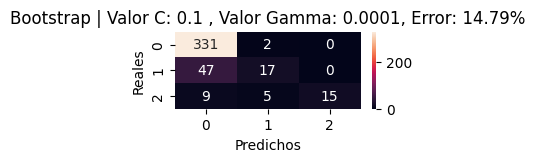

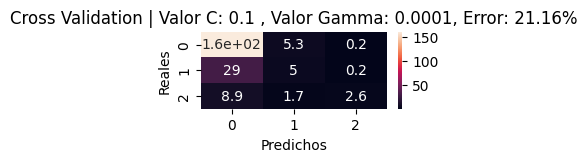

#################################################################


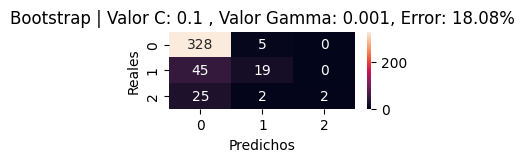

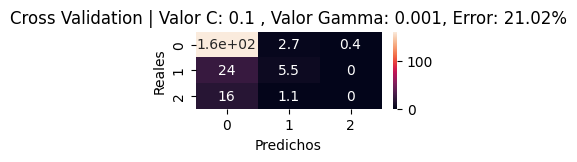

#################################################################


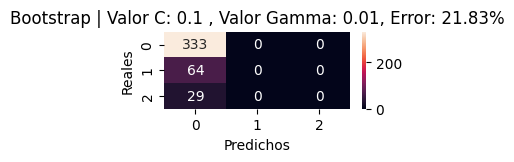

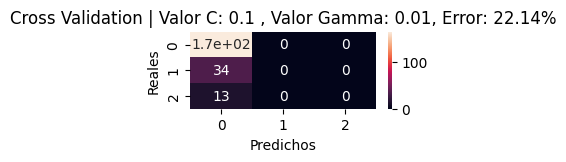

#################################################################


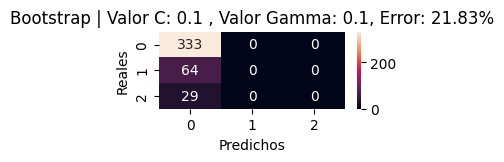

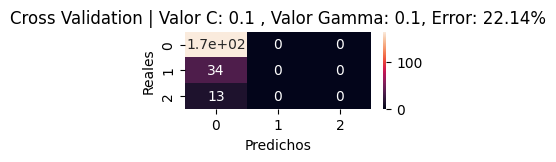

#################################################################


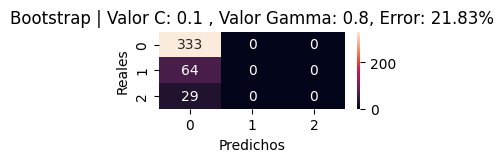

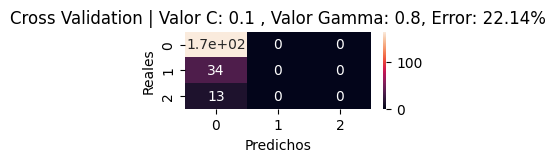

#################################################################


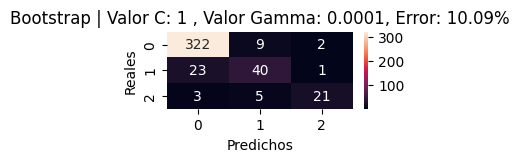

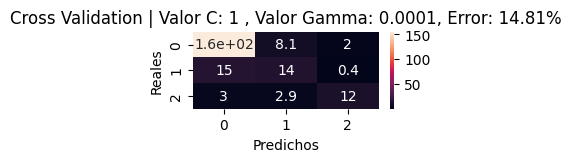

#################################################################


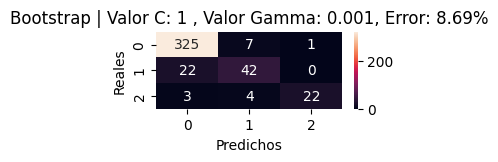

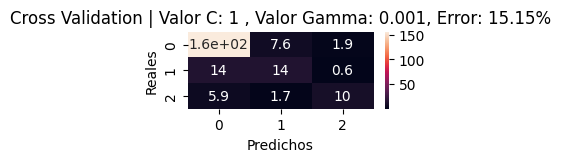

#################################################################


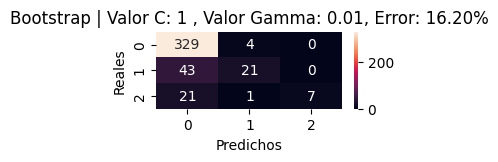

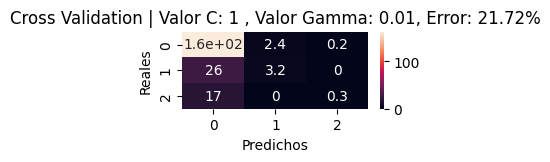

#################################################################


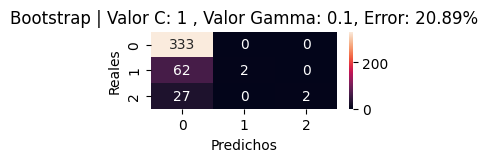

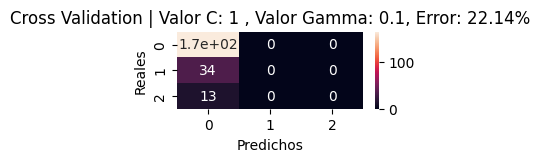

#################################################################


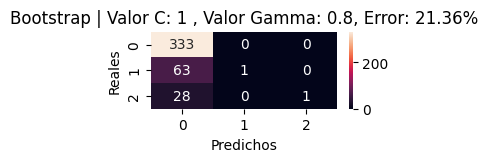

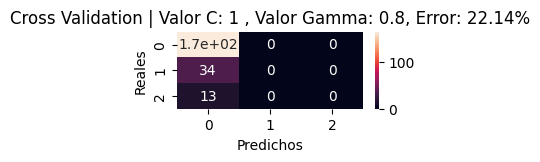

#################################################################


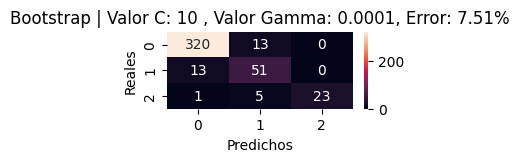

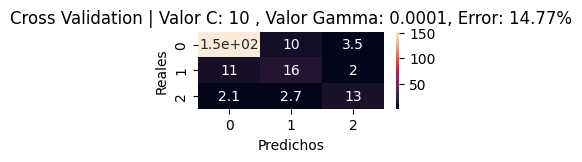

#################################################################


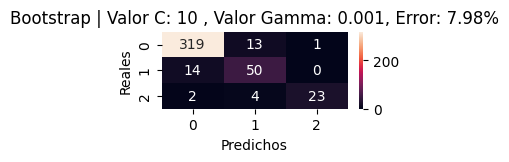

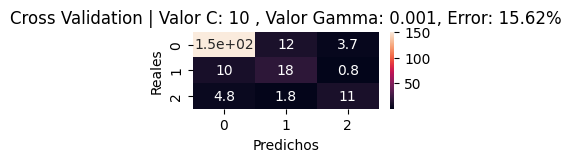

#################################################################


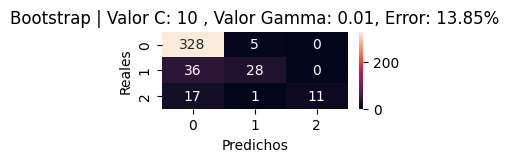

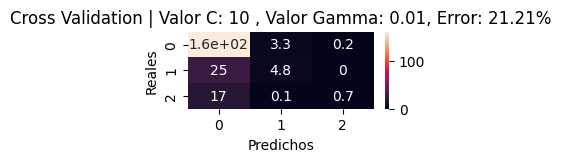

#################################################################


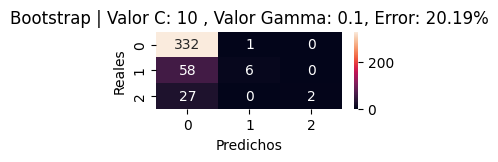

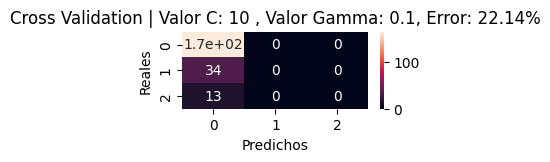

#################################################################


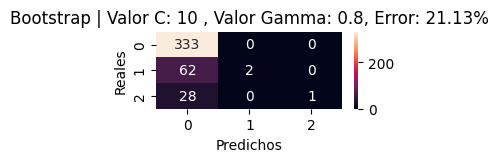

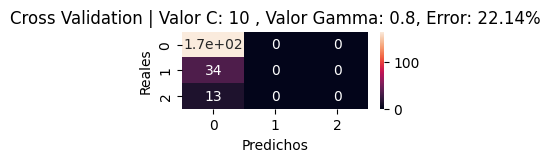

#################################################################


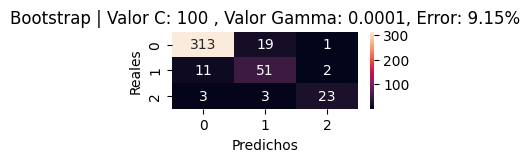

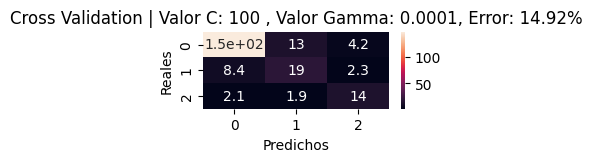

#################################################################


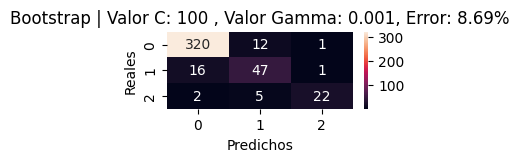

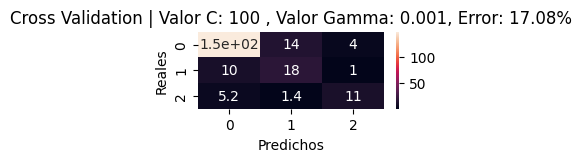

#################################################################


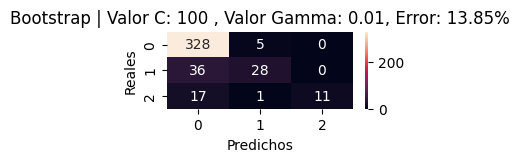

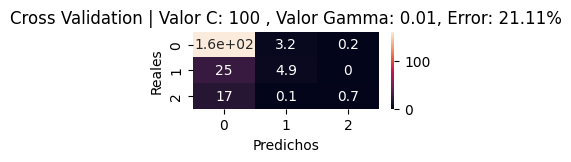

#################################################################


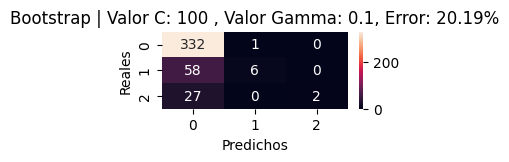

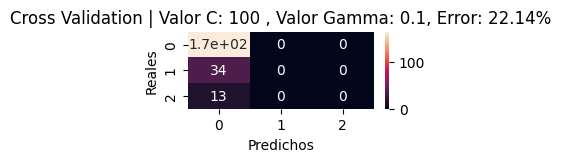

#################################################################


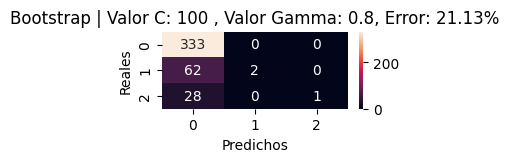

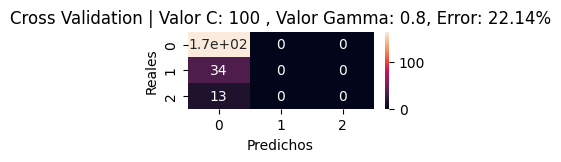

#################################################################


In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Divide los datos para entrenamiento Bootstrap 80% y test 20%
X_train_bootstrap, X_test_bootstrap, Y_train_bootstrap, Y_test_bootstrap = train_test_split(X, Y, test_size=0.2, random_state=42)


# Realiza la prueba con diferentes valores de C y gamma
C_values = [0.1, 1, 10, 100]
gamma_values = [0.0001, 0.001, 0.01, 0.1,0.8]

resultados = []

for C in C_values:
    for gamma in gamma_values:
      #VALIDAR CON BOOTSTRAP
      clf = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=C, gamma=gamma)
      model = clf.fit(X_train_bootstrap, Y_train_bootstrap)
      y_pred = model.predict(X_test_bootstrap)
      error=classification_error(y_pred, Y_test_bootstrap)
      matriz_confusion = confusion_matrix(Y_test_bootstrap, y_pred)

      # Visualizar la matriz de confusión
      plt.figure(figsize=(3,1))
      sns.heatmap(matriz_confusion, annot=True, fmt='d')
      plt.title('Bootstrap | Valor C: {} , Valor Gamma: {}, Error: {:.2f}%'.format(C,gamma,error*100))
      plt.xlabel('Predichos')
      plt.ylabel('Reales')
      plt.show()



      #VALIDACIÓN CON CROOS VALIDATION
      trained_model, error, error_std,matriz_promedio = train_svm_model(X, Y, C, gamma)

      # Visualizar la matriz de confusión
      plt.figure(figsize=(3,1))
      sns.heatmap(matriz_promedio, annot=True)
      plt.title('Cross Validation | Valor C: {} , Valor Gamma: {}, Error: {:.2f}%'.format(C,gamma,error*100))
      plt.xlabel('Predichos')
      plt.ylabel('Reales')
      plt.show()

      print('#################################################################')



Se realizó una validación de bootstrap de 80% para entranamiento y 20% para test, para un total de 1700 para entrenar el modelo y 426 registros para testear el modelo.
Luego se procedió a entrenar el modelo para cada valor de C y gamma planteado, y para cada dupla de C y gamma se contruyó una tabla de matrix de confusión según sus valores predichos.

## Ejercicio 3

Ahora va a resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality) usando SVM para regresión.

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [ ]:
#cargamos la bd de entrenamiento
import numpy as np
import time
from sklearn import svm
from sklearn.model_selection import KFold
import time
db = np.loadtxt('https://raw.githubusercontent.com/Joanri20/modelosysimulaciondos/trunk/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print ("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)

print ("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print ("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))

    #data.write(str(DataBase[k,:]))

#data.close()
print ("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [ ]:
X_qua = DataBase[:,0:12]

Y_qua = DataBase[:,12]*10 #(se multiplica por 100 para evitar errores en la interpretación de la eficiencia del modelo porque
                 # los valores de Y menores que 1 pueden llevar a malas interpretaciones).

In [ ]:
#Error cuadrático medio (para problemas de regresión)
def ECM(Y_est,Y_real):
    N = np.size(Y_real)
    ecm = sum((Y_est - Y_real)**2)/N
    return ecm


#Complete el código para crear el modelo SVM para regresión.
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}
C_values_qua = [0.1,100]
gamma_values_qua = [0.0001,0.1]


#Implemetamos la metodología de validación cross validation con 10 folds


for C in C_values_qua:
    for gamma in gamma_values_qua:
      tiempo_i = time.time()
      # Crear el modelo SVM para regresión
      model = svm.SVR(kernel='rbf', C=C, gamma=gamma)
      Errores = np.ones(10)
      j = 0
      kf = KFold(n_splits=10)
      for train_index, test_index in kf.split(X_qua):

          X_train, X_test = X_qua[train_index], X_qua[test_index]
          y_train, y_test = Y_qua[train_index], Y_qua[test_index]

          model = model.fit(X_train, y_train)

          #Complete el código aquí
          # Validación del modelo
          y_pred = model.predict(X_test)

          Errores[j] = ECM(y_pred, y_test)
          j+=1

      print('VALOR C:',C)
      print('VALOR GAMMA:',gamma)
      print("Error de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
      print("Tiempo total de ejecución: {:.2f} segundos".format(time.time() - tiempo_i))
      print("\n#####################################################")


VALOR C: 0.1
VALOR GAMMA: 0.0001

Error de validación: 77.0455110069315 +/- 77.98361241096553

Tiempo total de ejecución: 57.20 segundos
VALOR C: 0.1
VALOR GAMMA: 0.1

Error de validación: 88.61964560703125 +/- 88.4438706939143

Tiempo total de ejecución: 61.51 segundos
VALOR C: 100
VALOR GAMMA: 0.0001

Error de validación: 20.56141022121127 +/- 26.686613444550055

Tiempo total de ejecución: 250.14 segundos
VALOR C: 100
VALOR GAMMA: 0.1

Error de validación: 83.01045685451956 +/- 79.94668488081116

Tiempo total de ejecución: 124.70 segundos


**3.1 Cuál es la finalidad de usar las funciones kernel en el modelo SVM?**

R/:A veces nos encontramos con problemas de SVM que no son reducibles con una simple separacion lineal en el espacio original, por esto utilizamos kernel para llevar los datos de entrada a un espacio caracteristico de mayor dimensionalidad.

**3.2 Qué puede decir de la viabilidad de este modelo pare resolver este problema, en términos del costo computacional?**

R/:En términos del costo computacional, se observa que el modelo con C=100 y gamma=0.0001 tiene un mayor tiempo de ejecución en comparación con las otras configuraciones. Esto se debe a que la optimización del modelo con valores C y gamma más grandes puede ser más costosa en términos de tiempo.

**3.3 Para cuál configuración del modelo encontró el menor ECM? Diga el valor de los parámetros del modelo.**


3.4 Haga una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Divide los datos para entrenamiento Bootstrap 70% y test 30%
X_train_bootstrap, X_test_bootstrap, Y_train_bootstrap, Y_test_bootstrap = train_test_split(X_qua, Y_qua, test_size=0.3, random_state=42)

# Entrenar el modelo con la mejor configuración
best_model = svm.SVR(kernel='rbf', C=100, gamma=0.0001)
best_model.fit(X_train_bootstrap, Y_train_bootstrap)
# Predecir los valores en el conjunto de prueba
y_pred = best_model.predict(X_test_bootstrap)



In [ ]:
y_pred1 = y_pred[:]
y_pred1.shape

(2698,)

In [ ]:
Y_test_bootstrap1 = Y_test_bootstrap[:]
Y_test_bootstrap1.shape

(2698,)

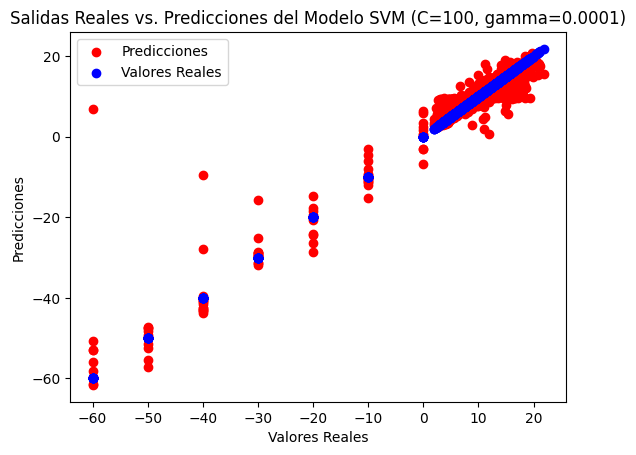

In [ ]:
plt.scatter(Y_test_bootstrap, y_pred, color='r', label='Predicciones')  # Predicciones en rojo
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.scatter(Y_test_bootstrap, Y_test_bootstrap, color='b', label='Valores Reales')  # Valores reales en azul
plt.title("Salidas Reales vs. Predicciones del Modelo SVM (C=100, gamma=0.0001)")
plt.legend()
plt.show()